In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from utils import sigmoid, get_batch, normalization

In [6]:
def propogate(w, b, x):
    cache = []
    a = x
    i = 0
    while i < len(w) - 1:
        z = np.dot(w[i], a) + b[i]
        a = relu(z)
        cache.append(a)
        i += 1
    z = np.dot(w[i], a) + b[i]
    a = sigmoid(z)
    cache.append(a)
    return a, cache

In [7]:
def relu(z):
    a = np.maximum(0,z)
    return a

In [15]:
def initialize(layer):
    W = []
    B = []
#     Vw = []
#     Vb = []
    
    for i in range(1, len(layer)):
        w = np.random.randn(layer[i], layer[i-1])
        b = np.zeros((layer[i], 1))
        W.append(w)
        B.append(b)
        
#         vw = np.zeros((layer[i], layer[i-1]))
#         vb = np.zeros((layer[i], 1))
        
#         Vw.append(vw)
#         Vb.append(vb)
        
        
    return W, B

In [18]:
dim = [4,3,1]
W,B = initialize(dim)
for w in W:
    print(w)

[[ 0.31368905 -1.47854282 -2.46118926 -1.47629384]
 [ 1.11789201 -0.99160646 -0.34822645  0.92348799]
 [-1.0732428   1.22446782  1.32373437 -0.0172361 ]]
[[-0.37992031  0.90559442 -0.18309495]]


In [16]:
def test(w,b,x,y):
    a = x
    for i in range(len(w)):
        a = propogate(w[i], b[i], a)
#     a1 = propogate(w1, b1, x)
#     a2 = propogate(w2, b2, a1)
    predict = np.where(a < 0.5, 0, 1)
    return 1 - np.mean(np.abs(predict - y), axis=1)

In [8]:

X = np.load('data/train_x.npy')
Y = np.load('data/train_y.npy')

Xt = np.load('data/test_x.npy')
Yt = np.load('data/test_y.npy')
print('the shape of X is', X.shape)
print('the shape of Y is', Y.shape)

the shape of X is (510, 48896)
the shape of Y is (1, 48896)


Training on 1000 batch,train set accuty is 0.81, loss is 0.401347. Test Accury is 0.814179
Training on 2000 batch,train set accuty is 0.83, loss is 0.363808. Test Accury is 0.819403
Training on 3000 batch,train set accuty is 0.87, loss is 0.392688. Test Accury is 0.81847
Training on 4000 batch,train set accuty is 0.87, loss is 0.323132. Test Accury is 0.833022
Training on 5000 batch,train set accuty is 0.83, loss is 0.299649. Test Accury is 0.836567
Training on 6000 batch,train set accuty is 0.87, loss is 0.300158. Test Accury is 0.835821
Training on 7000 batch,train set accuty is 0.79, loss is 0.422344. Test Accury is 0.827239
Training on 8000 batch,train set accuty is 0.82, loss is 0.359441. Test Accury is 0.842351
Training on 9000 batch,train set accuty is 0.8, loss is 0.394121. Test Accury is 0.845336
Training on 10000 batch,train set accuty is 0.78, loss is 0.47253. Test Accury is 0.843657
Training on 11000 batch,train set accuty is 0.85, loss is 0.353438. Test Accury is 0.85056
T

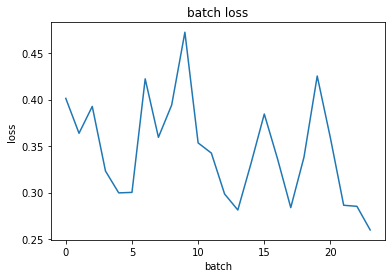

In [19]:
# dim1 = 510
# dim2 = 250
# dim3 = 125
# dim4 = 1

epsilon = 1e-9
TRAIN_STEP = 50
alpha = 0.25
A0 = alpha
BATCH_SIZE = 100
LEARNING_RATE_DECAY = 0.5
BETA = 0.9

w1 = np.random.randn(dim2, dim1)
b1 = np.zeros((dim2, 1))

w2 = np.random.randn(dim3, dim2)
b2 = np.zeros((dim3, 1))


w3 = np.random.randn(dim4, dim3)
b3 = np.zeros((dim4, 1))

vdw1 = np.zeros((dim2, dim1))
vdb1 = np.zeros((dim2, 1))
vdw2 = np.zeros((dim3, dim2))
vdb2 = np.zeros((dim3, 1))
vdw3 = np.zeros((dim4, dim3))
vdb3 = np.zeros((dim4, 1))

losses = []
k = 1
for epoch in range(TRAIN_STEP):
    index = 0
    while True:
        x, y, index = get_batch(index, BATCH_SIZE, X, Y)
        if x is None:
            break
            
        a1 = propogate(w1, b1, x)
        a2 = propogate(w2, b2, a1)
        a3 = propogate(w3, b3, a2)

        m = y.shape[1]
        cross_entropy = (1 - y) * np.log(1 - a3 + epsilon) + y * np.log(a3 + epsilon)
        loss = -1 / m * np.sum(cross_entropy)
        
        dz3 = a3 - y
        dw3 = 1 / m * np.dot(dz3, a2.T)
        db3 = 1 / m * np.sum(dz3, axis=1, keepdims=True)
        
        
        da2 = np.dot(w3.T, dz3)
        dz2 = da2 * a2 * (1-a2)
        dw2 = 1 / m * np.dot(dz2, a1.T)
        db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True)
        
        da1 = np.dot(w2.T, dz2)
        dz1 = da1 * a1 * (1 - a1)
        dw1 = 1 / m * np.dot(dz1, x.T)
        db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)
        
        vdw3 = BETA * vdw3 + (1-BETA) * dw3
        vdb3 = BETA * vdb3 + (1-BETA) * db3
        
        vdw2 = BETA * vdw2 + (1-BETA) * dw2
        vdb2 = BETA * vdb2 + (1-BETA) * db2
        
        vdw1 = BETA * vdw1 + (1-BETA) * dw1
        vdb1 = BETA * vdb1 + (1-BETA) * db1
        
        w3 = w3 - alpha * vdw3
        b3 = b3 - alpha * vdb3  
        
        w2 = w2 - alpha * vdw2
        b2 = b2 - alpha * vdb2
        
        w1 = w1 - alpha * vdw1
        b1 = b1 - alpha * vdb1
        
                 
        if k % 1000 == 0:
            losses.append(loss)
            w = [w1,w2,w3]
            b = [b1,b2,b3]
            accury = test(w,b,Xt,Yt)
            train_acc = test(w,b,x,y)
            print('Training on %d batch,train set accuty is %g, loss is %g. Test Accury is %g'\
                  %(k,train_acc, loss, accury))
        k += 1
        
#     alpha = A0 / (1 + LEARNING_RATE_DECAY * epoch) 

plt.figure()
plt.plot(losses)
plt.title('batch loss')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()
        



In [10]:
path_test ='data/X_test'
dft = pd.read_csv(path_test, dtype=np.float32)
Xtest = dft.iloc[:, 1:].values
Xtest = Xtest.T
dft = None
Xtest = normalization(Xtest)

In [11]:
# 使用训练模型预测数据
w = [w1,w2,w3]
b = [b1,b2,b3]
a = Xtest
for i in range(len(w)):
    a = propogate(w[i], b[i], a)

predict = np.where(a < 0.5, 0, 1)
print('prediction shape is ', predict.shape)

prediction shape is  (1, 27622)


In [12]:
result = pd.DataFrame(predict.T, columns=['label'])
# num = 5
path_result = 'data/result_{}_{}.csv'.format(dim2,alpha)
result.to_csv(path_result)